In [1]:
from utility_dfplotter import *

# 1. Plot Nominal Distriubitons

In [2]:
def plotDataFrames():#
    for seletion in ["emu","mumu","mutau","ee","emu2","etau","e4j","mu4j","mu4j_fakes","e4j_fakes","mutau_fakes","etau_fakes"]:
    #for seletion in ["mumu"]:
        for nbjet in ["==1",">1"]:
            plotter = DFPlotter(seletion,nbjet)
            plotter.plotKinematics()
plotDataFrames()

making plots -- etau_fakes nbjet>1: 33/33


# 2. Plot Systematics

In [3]:
for s in ["emu","mumu","mutau","mu4j","ee","emu2","etau","e4j"]:
    sp = SystematicPlotter(s,">=1",'FSR')
    sp.plotKinematics()

In [4]:
names = ["mcdiboson","mcw",'mct','mctt',"mcz","data2016"]

selection = 'etau0'
dfList = [DFCutter(selection, '', name ).getDataFrame() for name in names]

Fake = pd.DataFrame()
for name in names:
    temp =  DFCutter(selection+'_fakes', '', name).getDataFrame()
    if not name == 'data2016':
        temp.eventWeight = -1*temp.eventWeight
    Fake = Fake.append(temp,ignore_index=True)

dfList = [Fake] + dfList

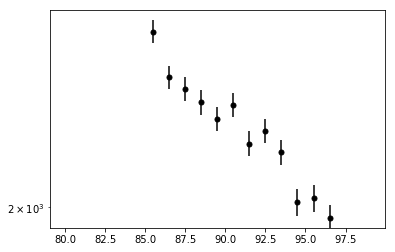

In [8]:
v,a,b,step,xl = 'dilepton_mass',80,100,1,'lepton2_pt'

mybins = np.arange(a,b,step)
center = mybins[1:] - step/2

hmc = plt.hist( [dfList[i][v].values for i in range(1)], bins = mybins,
         weights = [dfList[i]['eventWeight'].values for i in range(1)], 
         stacked=True)[0]

hdata = np.histogram( dfList[-1][v].values, bins = mybins )[0]
plt.errorbar(center,hdata,yerr = hdata**0.5,color ='k',fmt='.',markersize=10)
plt.yscale('log')